<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/MNIST_xavier_he.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

# 수치미분 함수

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [11]:
class MNIST_Test:

  def __init__(self, i_nodes, h_nodes, o_nodes, learning_rate):

    self.i_nodes = i_nodes
    self.h_nodes = h_nodes
    self.o_nodes = o_nodes

    self.W2 = np.random.randn(self.i_nodes, self.h_nodes) / np.sqrt(self.i_nodes/2)
    self.b2 = np.random.rand(self.h_nodes)

    self.W3 = np.random.randn(self.h_nodes, self.o_nodes) / np.sqrt(self.h_nodes/2)
    self.b3 = np.random.rand(self.o_nodes)

    self.learning_rate = learning_rate

  def feed_forward(self):

    delta = 1e-7

    z2 = np.dot(self.input_data,self.W2) + self.b2
    a2 = sigmoid(z2)

    z3= np.dot(a2,self.W3) + self.b3
    y = a3 = sigmoid(z3)

    return -np.sum(self.target_data*np.log(y+delta) + (1-self.target_data)*np.log((1-y)+delta))

  def loss_val(self):

    delta = 1e-7

    z2 = np.dot(self.input_data,self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    y = a3 = sigmoid(z3)

    return -np.sum(self.target_data*np.log(y+delta) + (1-self.target_data)*np.log((1-y)+delta))

  def predict(self,input_data):

    z2 = np.dot(input_data,self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    y = a3 = sigmoid(z3)

    predicted_num = np.argmax(y)

    return predicted_num

  def accuracy(self, input_data, target_data):

    matched_list = []
    unmatched_list = []

    for i in range(len(input_data)):
      
      label = target_data[i]
      data = input_data[i]/255.0 * 0.99 + 0.01

      predicted_num = self.predict(data)

      if label == predicted_num:
        matched_list.append(i)
      else:
        unmatched_list.append(i)

    accuracy_result = len(matched_list)/len(input_data)

    print("Accuracy result = ",accuracy_result)

    return matched_list, unmatched_list

  def train(self,input_data, target_data):

    self.input_data = input_data
    self.target_data = target_data

    f = lambda x : self.feed_forward()

    self.W2 -= self.learning_rate * numerical_derivative(f,self.W2)
    self.b2 -= self.learning_rate * numerical_derivative(f,self.b2)

    self.W3 -= self.learning_rate * numerical_derivative(f,self.W3)
    self.b3 -= self.learning_rate * numerical_derivative(f,self.b3)

In [12]:
training_data = np.loadtxt('drive/My Drive/AI_INOVATION_SQUARE/prac/mnist_train.csv',delimiter=',',dtype=np.float32)
print("training_data.shape = ",training_data.shape)

training_data.shape =  (60000, 785)


In [13]:
#hyper_parameter

i_nodes = training_data.shape[1] - 1
h_nodes = 1
o_nodes = 10
lr = 1e-2
epochs = 1

loss_val_list = []

obj1 = MNIST_Test(i_nodes,h_nodes,o_nodes,lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):

  for i in range(len(training_data)):

    input_data = ((training_data[i,1:]/255.0) * 0.99 + 0.01)

    target_data = np.zeros(o_nodes) + 0.01
    target_data[int(training_data[i,0])] = 0.99

    obj1.train(input_data, target_data)

    if i % 2000 == 0:
      print("epochs = ", step, ", index = ", i, ", loss value = ",obj1.loss_val())

    loss_val_list.append(obj1.loss_val())

end_time = datetime.now()

print("")
print("Elapsed time -> ",end_time - start_time)

Neural Network Learning using Numerical Derivative...
epochs =  0 , index =  0 , loss value =  7.648271516767036
epochs =  0 , index =  2000 , loss value =  3.453435215812275
epochs =  0 , index =  4000 , loss value =  3.16921672502193
epochs =  0 , index =  6000 , loss value =  3.24450558346775
epochs =  0 , index =  8000 , loss value =  3.1810173308566143
epochs =  0 , index =  10000 , loss value =  2.821715810746871
epochs =  0 , index =  12000 , loss value =  3.102982854981023
epochs =  0 , index =  14000 , loss value =  3.1592910298713845
epochs =  0 , index =  16000 , loss value =  3.288211187048609
epochs =  0 , index =  18000 , loss value =  3.166854405512074
epochs =  0 , index =  20000 , loss value =  3.246223092614481
epochs =  0 , index =  22000 , loss value =  2.6160233942037077
epochs =  0 , index =  24000 , loss value =  3.3079073682445976
epochs =  0 , index =  26000 , loss value =  3.055181370507998
epochs =  0 , index =  28000 , loss value =  2.9303862412951434
epochs

In [14]:
test_data = np.loadtxt('./drive/My Drive/AI_INOVATION_SQUARE/prac/mnist_test.csv', delimiter=',', dtype = np.float32)
print("test data.shape = ",test_data.shape)

test_input_data = test_data[:, 1: ]
test_target_data = test_data[:,0]

(true_list_1, false_list_1) = obj1.accuracy(test_input_data, test_target_data)

test data.shape =  (10000, 785)
Accuracy result =  0.2174


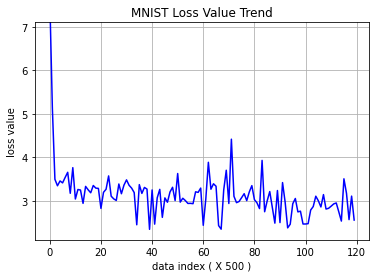

In [15]:
# 손실함수 추세 확인
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 500):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500 )')
plt.ylabel('loss value')
plt.grid()
plt.ylim(2.1, 7.1)
plt.plot(Y_DATA_LIST, color='b')
plt.show()

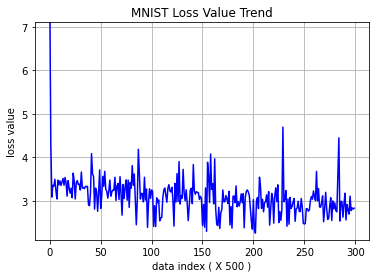

In [16]:
# 손실함수 추세 확인
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 200):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500 )')
plt.ylabel('loss value')
plt.grid()
plt.ylim(2.1, 7.1)
plt.plot(Y_DATA_LIST, color='b')
plt.show()

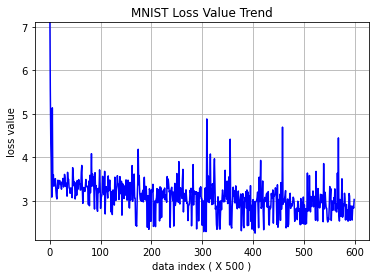

In [17]:
# 손실함수 추세 확인
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 100):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500 )')
plt.ylabel('loss value')
plt.grid()
plt.ylim(2.1, 7.1)
plt.plot(Y_DATA_LIST, color='b')
plt.show()